# Test Data Preparation

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

import utility as util

In [2]:
ratto_pipeline_data_dir = Path('/net/birdstore/Active_Atlas_Data/data_root/pipeline_data')

## Load image stacks

In [3]:
def load_image_stack(image_dir, channel=1):
    image_dir = Path(image_dir).resolve()
    image_stack = []
    for image_file in sorted(image_dir.iterdir()):
        print(f'Loading image {image_file.name}', end='\r')
        image = sitk.ReadImage(image_file.as_posix())
        image_arr = sitk.GetArrayViewFromImage(image).copy()
        image_stack.append(image_arr[:,:,channel-1].T)
    print(f'Finished loading {len(image_stack)} images')
    image_stack = np.stack(image_stack, axis=-1)
    return image_stack

Finished loading 446 images
(1193, 875, 446)


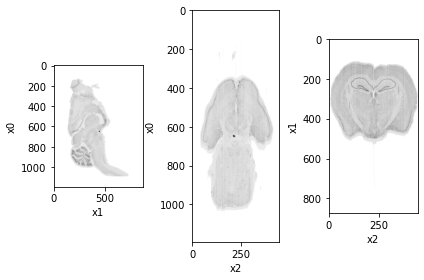

In [4]:
image_585 = load_image_stack(ratto_pipeline_data_dir / 'MD585/preps/CH1/thumbnail_aligned')
print(image_585.shape)
util.imshow_midslice(image_585)

Finished loading 447 images
(1365, 1012, 447)


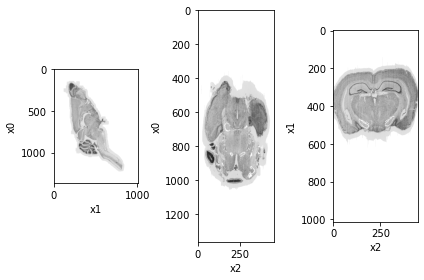

In [5]:
image_589 = load_image_stack(ratto_pipeline_data_dir /'MD589/preps/CH1/thumbnail_aligned')
print(image_589.shape)
util.imshow_midslice(image_589)

Finished loading 433 images
(1468, 728, 433)


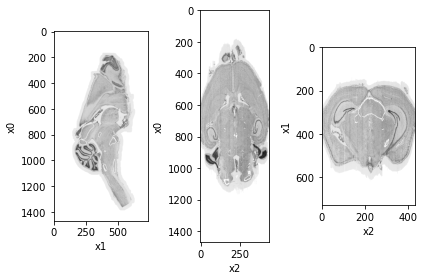

In [6]:
image_594 = load_image_stack(ratto_pipeline_data_dir /'MD594/preps/CH1/thumbnail_aligned')
print(image_594.shape)
util.imshow_midslice(image_594)

## Reverse intensity value

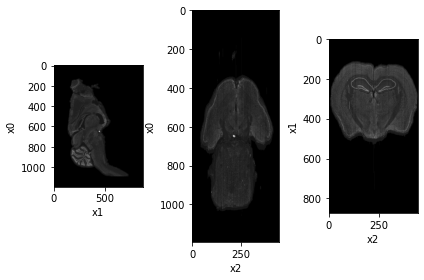

In [7]:
image_585 = 255 - image_585
util.imshow_midslice(image_585)

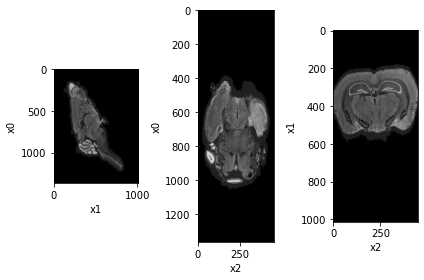

In [8]:
image_589 = 255 - image_589
util.imshow_midslice(image_589)

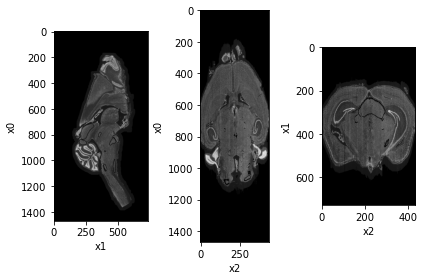

In [9]:
image_594 = 255 - image_594
util.imshow_midslice(image_594)

## Crop images to save space and computation

In [10]:
def crop(image, crop_value=0):
    xi = 0
    for xi in range(image.shape[0]):
        if not (image[xi,:,:] ==  crop_value).all():
            break
    xj = image.shape[0]
    for xj in reversed(range(image.shape[0])):
        if not (image[xj,:,:] == crop_value).all():
            xj += 1
            break
    yi = 0
    for yi in range(image.shape[1]):
        if not (image[:,yi,:] ==  crop_value).all():
            break
    yj = image.shape[1]
    for yj in reversed(range(image.shape[1])):
        if not (image[:,yj,:] == crop_value).all():
            yj += 1
            break
    zi = 0
    for zi in range(image.shape[2]):
        if not (image[:,:,zi] ==  crop_value).all():
            break
    zj = image.shape[2]
    for zj in reversed(range(image.shape[2])):
        if not (image[:,:,zj] == crop_value).all():
            zj += 1
            break
    return image[xi:xj,yi:yj,zi:zj]

(1067, 658, 446)


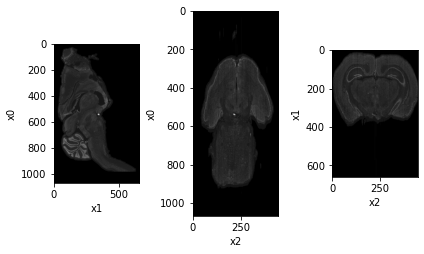

In [11]:
image_585 = crop(image_585)
print(image_585.shape)
util.imshow_midslice(image_585)

(1158, 771, 447)


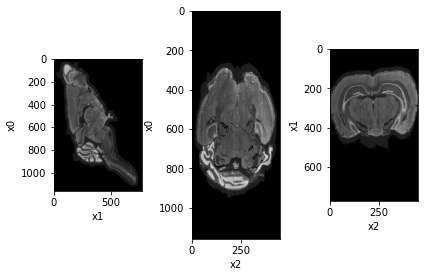

In [12]:
image_589 = crop(image_589)
print(image_589.shape)
util.imshow_midslice(image_589)

(1245, 521, 433)


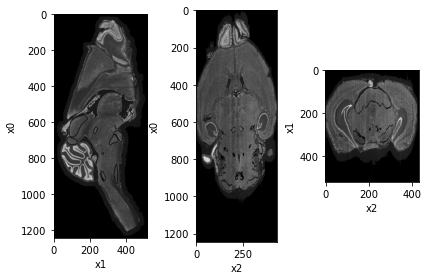

In [13]:
image_594 = crop(image_594)
print(image_594.shape)
util.imshow_midslice(image_594)

## Pad images to be the same shape

In [14]:
def pad(images):
    shape = np.array(list(map(lambda image: image.shape, images))).max(axis=0)

    def put_in_the_middle(canvas, image):
        dx, dy, dz = image.shape
        x, y, z = (np.array(canvas.shape) - np.array(image.shape)) // 2
        canvas[x:x+dx,y:y+dy,z:z+dz] = image
        
    padded_images = []
    for image in images:
        canvas = np.zeros(shape, dtype=image.dtype)
        put_in_the_middle(canvas, image)
        padded_images.append(canvas)
    return padded_images

In [15]:
image_585, image_589, image_594 = pad([image_585, image_589, image_594])
print(image_585.shape)
print(image_589.shape)
print(image_594.shape)

(1245, 771, 447)
(1245, 771, 447)
(1245, 771, 447)


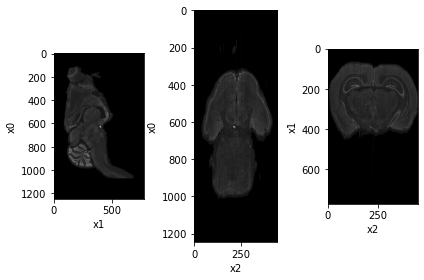

In [16]:
util.imshow_midslice(image_585)

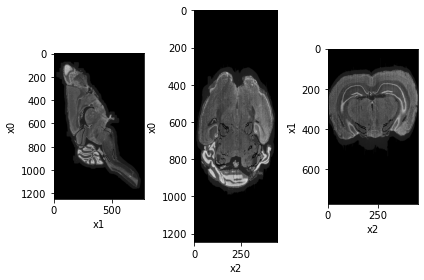

In [17]:
util.imshow_midslice(image_589)

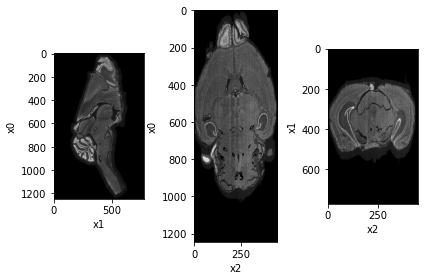

In [18]:
util.imshow_midslice(image_594)

## Save image to npy file

In [19]:
np.save('../data/local/MD585_CH1.npy', image_585)

In [20]:
np.save('../data/local/MD589_CH1.npy', image_589)

In [21]:
np.save('../data/local/MD594_CH1.npy', image_594)